In [2]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import boston_housing
from sklearn import preprocessing

In [3]:
(train_x,train_y),(test_x,test_y)=boston_housing.load_data()

In [4]:
df = boston_housing.load_data()
df

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [5]:
print("train shape: ",train_x.shape)
print("test shape: ",test_x.shape)
print("actual train output:",train_y.shape)
print("actual test output:",test_y.shape)

train shape:  (404, 13)
test shape:  (102, 13)
actual train output: (404,)
actual test output: (102,)


In [6]:
#normalization for preprocessing
train_x=preprocessing.normalize(train_x)
test_x=preprocessing.normalize(test_x)

In [7]:
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
def HousePricePredictionModel():  
	model=Sequential()
	model.add(Dense(128,activation='relu',input_shape=(train_x[0].shape)))
	model.add(Dense(64,activation='relu'))
	model.add(Dense(32,activation='relu'))
	model.add(Dense(1))
	model.compile(optimizer='adam',loss='mse',metrics=['mae'])
	return model

In [8]:
import numpy as np
k=4
num_val_samples=len(train_x)
num_epochs=100
all_scores=[]

In [9]:
model= HousePricePredictionModel()
history=model.fit(x=train_x,y=train_y,epochs=num_epochs,batch_size=1,verbose=1,validation_data=(test_x,test_y))

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 262.0843 - mae: 12.9220 - val_loss: 70.2351 - val_mae: 5.9126
Epoch 2/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 77.4781 - mae: 6.4141 - val_loss: 59.4261 - val_mae: 5.5890
Epoch 3/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55.1673 - mae: 5.1094 - val_loss: 56.1329 - val_mae: 5.6346
Epoch 4/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 65.2215 - mae: 5.7055 - val_loss: 57.1796 - val_mae: 5.4559
Epoch 5/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 58.2554 - mae: 5.1537 - val_loss: 68.1394 - val_mae: 5.8286
Epoch 6/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 49.8088 - mae: 4.8141 - val_loss: 61.1883 - val_mae: 5.5197
Epoch 7/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 56.2271 - mae: 5.0741 - val_loss: 51.2558 - val_mae: 5.1389
Epoch 8/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 60.8537 - mae: 5.1679 - val_loss: 60.0224 - val_mae: 5.4627
Epoch 9/100
404/404 ━━━━━━━━━━

In [10]:
mse, mae = model.evaluate(test_x, test_y)
print('Mean squared error on test data: ', mse)
print('Mean absolute error on test data: ', mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.8033 - mae: 3.3070  
Mean squared error on test data:  28.183549880981445
Mean absolute error on test data:  3.5433852672576904


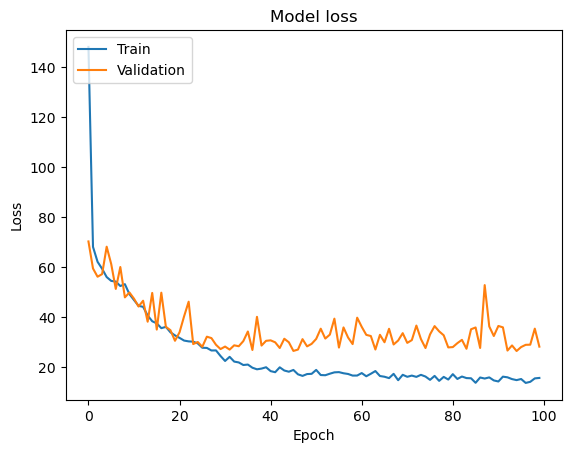

In [20]:
import matplotlib.pyplot as plt

# Assuming `history` contains the training history

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


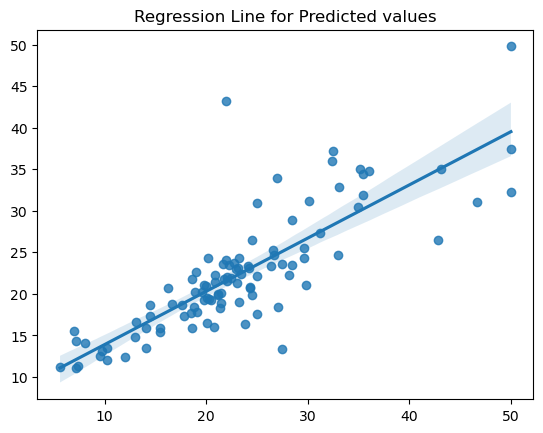

In [24]:
import seaborn as sns
y_pred = model.predict(test_x)
sns.regplot(x=test_y, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()